<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Sujith_DL_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1


In [3]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2025-03-21 00:32:09--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-03-21 00:32:10--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-03-21 00:32:11--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suj1thj","key":"3dc5388c161a5e22040f8e552d6c2eb0"}'}

In [6]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!kaggle competitions download -c dogs-vs-cats

In [7]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip
!unzip -qq test1.zip

In [8]:
import os
image_dir="train/"
input_img_paths = sorted(
    [os.path.join(image_dir, fname)
     for fname in os.listdir(image_dir)
     if fname.endswith(".jpg")])

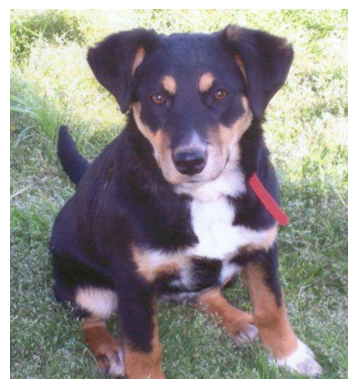

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import random
plt.axis("off")
k=random.randint(0, len(input_img_paths))
test_img=load_img(input_img_paths[k])
plt.imshow(test_img)
# plt.show(
# print(test_img.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


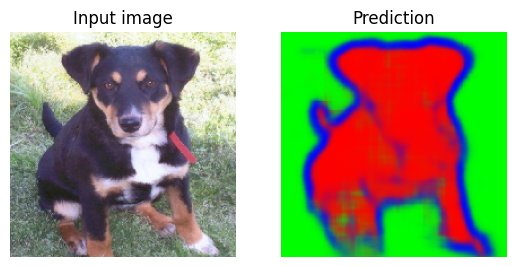

In [10]:
from tensorflow.keras.utils import array_to_img
from tensorflow import keras
import numpy as np
model = keras.models.load_model("/content/drive/MyDrive/my_segmentation_model.keras")
test_img=load_img(input_img_paths[k],target_size=(200,200))
# plt.imshow(array_to_img(test_img))
mask = model.predict(np.expand_dims(test_img, 0))[0]

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    # plt.imshow(mask)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Input image")
plt.imshow(test_img)
plt.subplot(1, 2, 2)
plt.title("Prediction")
plt.axis("off")

# display_mask(mask)
plt.imshow(mask)

Part 2

In [11]:
from tensorflow import keras
from keras.applications import MobileNetV2
# model = keras.models.load_model("")
model = MobileNetV2(
    input_shape=(180, 180, 3),
    alpha=1.0,  # Width multiplier
    include_top=False,  # Remove classification layer
    weights='imagenet',
    pooling='avg'  # Global average pooling
)
# model.summary()

<ipython-input-11-057fcc7f98e0>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(target_size):
    img = test_img
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array
img_tensor=get_img_array(target_size=(180, 180))



80329/80329 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


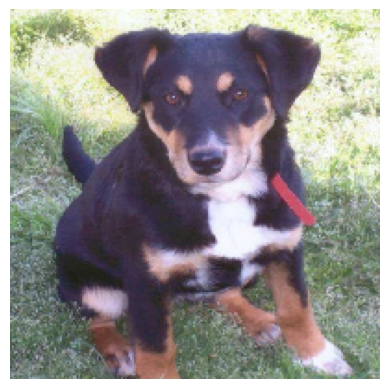

In [13]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [14]:
import pathlib
import os
import shutil
original_dir=pathlib.Path("train")
new_base_dir=pathlib.Path("cats_vs_dogs_small")

def subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        file_names=[f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for file_name in file_names:
            shutil.copyfile(src=original_dir / file_name,
                            dst=dir / file_name)


In [15]:
subset("train", start_index=0, end_index=1000)
subset("validation", start_index=1000, end_index=1500)
subset("test", start_index=1500, end_index=2500)

In [27]:
from tensorflow import keras
from keras import layers
base_model = keras.applications.MobileNetV2(
    input_shape=(180, 180, 3),
    include_top=False,
    weights="imagenet"
)


base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

<ipython-input-27-4c4da2b1fdaa>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
from tensorflow.keras.utils import image_dataset_from_directory
train_data=image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_data=image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_data=image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [29]:
history = model.fit(train_data,epochs=15,validation_data=validation_data)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.5509 - loss: 0.6959 - val_accuracy: 0.6430 - val_loss: 0.6290
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6713 - loss: 0.6073 - val_accuracy: 0.6960 - val_loss: 0.5858
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6896 - loss: 0.5752 - val_accuracy: 0.7030 - val_loss: 0.5692
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7148 - loss: 0.5575 - val_accuracy: 0.7170 - val_loss: 0.5577
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7447 - loss: 0.5366 - val_accuracy: 0.7260 - val_loss: 0.5575
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7323 - loss: 0.5293 - val_accuracy: 0.7320 - val_loss: 0.5449
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7372 - loss: 0.5237 - val_accuracy: 0.7450 - val_loss: 0.5431
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7551 - loss: 0.5097 - val_accuracy: 0.6670 -

In [30]:
model.save("/content/drive/MyDrive/mobilenet_cats_dogs.keras")


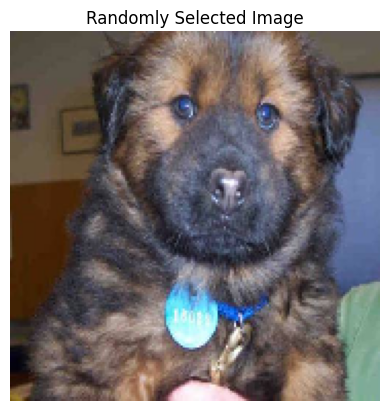

In [37]:
cat_dir = os.path.join("/content/cats_vs_dogs_small/test/cat")
dog_dir = os.path.join("/content/cats_vs_dogs_small/test/dog")

random_cat_img = os.path.join(cat_dir, np.random.choice(os.listdir(cat_dir)))
random_dog_img = os.path.join(dog_dir, np.random.choice(os.listdir(dog_dir)))
random_img_path = np.random.choice([random_cat_img, random_dog_img])

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(random_img_path, target_size=(180, 180))

plt.axis("off")
plt.title("Randomly Selected Image")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()


In [33]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [34]:
activations = activation_model.predict(img_tensor)

ValueError: Input 0 of layer "functional_6" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(1, 180, 180, 3)